## 1- Import Libraries

In [1]:
import pandas as pd
import numpy  as np

import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

## 2- Upload the Dataset

In [4]:
# Upload data

df = pd.read_csv('/Users/ilyasozgur/Desktop/Credit_Modelling/sample.csv')
nuts_list = pd.read_csv('/Users/ilyasozgur/Desktop/Credit_Modelling/nuts_1.csv')

## 3- Data Exploration

### 3.1- Initial Analysis

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98093 entries, 0 to 98092
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         98093 non-null  object 
 1   PoolCutoffDate             98093 non-null  object 
 2   LoanOriginationDate        98093 non-null  object 
 3   DateOfLoanMaturity         98093 non-null  object 
 4   BorrowersEmploymentStatus  98093 non-null  object 
 5   BorrowerType               98093 non-null  object 
 6   BorrowerYearOfBirth        56576 non-null  float64
 7   BorrowerCreditQuality      98093 non-null  object 
 8   BureauScoreValue           38189 non-null  float64
 9   ConstructionYear           19937 non-null  float64
 10  CurrentInterestRate        98093 non-null  float64
 11  CurrentInterestRateMargin  98093 non-null  float64
 12  FinalMargin                36475 non-null  float64
 13  CurrentValuationAmount     98057 non-null  flo

,ID,PoolCutoffDate,LoanOriginationDate,DateOfLoanMaturity,BorrowersEmploymentStatus,BorrowerType,BorrowerYearOfBirth,BorrowerCreditQuality,BureauScoreValue,ConstructionYear,CurrentInterestRate,CurrentInterestRateMargin,FinalMargin,CurrentValuationAmount,FirstTimeBuyer,FlexibleLoanAmount,CurrentBalance,OriginalBalance,ForeignNational,GeographicRegionList,LoanAge,Purpose,CLTV,TotalIncome,target
0,38933530,12/31/2016,01/01/2008,01/01/2025,NO DATA,NO DATA,1968.0,No Data,NaN,1950.0,2.7759,2.39,2.39,159453.27,N,NaN,49667.70,118000.0,No Data,UKG11,107,PURCHASE,31.148750,51500.0,0
1,38933309,12/31/2017,01/01/2001,01/01/2026,NO DATA,NO DATA,1976.0,No Data,NaN,1910.0,2.0200,1.50,1.50,131051.84,N,NaN,21187.83,47250.0,No Data,UKD11,203,PURCHASE,16.167519,21060.0,0
2,38933233,5/31/2017,07/01/2005,07/01/2030,EMPLOYED,NO DATA,1983.0,No Data,NaN,1935.0,3.3300,2.99,2.99,494755.16,N,NaN,200551.16,224544.0,No Data,UKI11,142,PURCHASE,40.535435,0.0,1
3,3893330,3/31/2016,04/01/2008,04/01/2033,NO DATA,NO DATA,1974.0,No Data,NaN,1910.0,3.4300,2.84,2.84,143621.55,N,NaN,102336.49,101600.0,No Data,UKK11,95,REMORTGAGE,71.254270,24255.0,0
4,38933054,3/31/2018,01/01/2006,01/01/2031,NO DATA,NO DATA,1977.0,No Data,NaN,1989.0,3.0700,2.49,2.49,194983.10,N,NaN,171645.92,177000.0,No Data,UKE11,146,PURCHASE,88.031180,55273.0,0


In [6]:
df.shape

(98093, 25)

### 3.2- Check the null values

In [7]:
df.isnull().sum()

ID                               0
PoolCutoffDate                   0
LoanOriginationDate              0
DateOfLoanMaturity               0
BorrowersEmploymentStatus        0
BorrowerType                     0
BorrowerYearOfBirth          41517
BorrowerCreditQuality            0
BureauScoreValue             59904
ConstructionYear             78156
CurrentInterestRate              0
CurrentInterestRateMargin        0
FinalMargin                  61618
CurrentValuationAmount          36
FirstTimeBuyer                   0
FlexibleLoanAmount           42040
CurrentBalance                   0
OriginalBalance                  0
ForeignNational                  0
GeographicRegionList             0
LoanAge                          0
Purpose                          0
CLTV                            29
TotalIncome                      0
target                           0
dtype: int64

### 3.3- Check dataset

In [8]:
df.describe()

,BorrowerYearOfBirth,BureauScoreValue,ConstructionYear,CurrentInterestRate,CurrentInterestRateMargin,FinalMargin,CurrentValuationAmount,FlexibleLoanAmount,CurrentBalance,OriginalBalance,LoanAge,CLTV,TotalIncome,target
count,56576.000000,38189.000000,19937.000000,98093.000000,98093.000000,36475.000000,9.805700e+04,56053.000000,9.809300e+04,9.809300e+04,98093.000000,9.806400e+04,9.809300e+04,98093.000000
mean,1966.126414,939.614706,1948.525706,3.373642,1.930933,0.677094,2.168267e+05,5262.716415,9.348497e+04,1.116967e+05,99.789587,1.672321e+02,4.139592e+04,0.284149
std,10.737155,238.119071,44.097670,1.396281,1.899722,1.251652,1.743889e+05,19202.408592,7.949611e+04,8.206267e+04,45.665194,1.788503e+04,4.568578e+04,0.451010
min,1914.000000,-999.000000,1700.000000,0.250000,0.000000,0.000000,1.070000e+00,-495956.280000,1.000230e+03,1.000000e+00,1.000000,7.853181e-02,0.000000e+00,0.000000
25%,1960.000000,916.000000,1928.000000,2.500000,0.000000,0.000000,1.160860e+05,0.000000,4.103837e+04,6.035000e+04,68.000000,2.420893e+01,2.311200e+04,0.000000
50%,1967.000000,1024.000000,1955.000000,3.640000,1.150000,0.000000,1.699713e+05,0.000000,7.680217e+04,9.500000e+04,96.000000,4.817849e+01,3.440000e+04,0.000000
75%,1973.000000,1079.000000,1980.000000,4.740000,4.090000,0.990000,2.600585e+05,240.000000,1.227673e+05,1.403960e+05,127.000000,7.057731e+01,5.000000e+04,1.000000
max,1997.000000,1440.000000,2018.000000,15.850000,7.000000,9.770000,6.542383e+06,531173.440000,1.874000e+06,3.293000e+06,672.000000,4.130223e+06,5.131000e+06,1.000000


## 4- Data Cleaning and Manipulations

### 4.1- Impute the missing values

In [9]:
# Check the null values again 

df.isnull().sum()

ID                               0
PoolCutoffDate                   0
LoanOriginationDate              0
DateOfLoanMaturity               0
BorrowersEmploymentStatus        0
BorrowerType                     0
BorrowerYearOfBirth          41517
BorrowerCreditQuality            0
BureauScoreValue             59904
ConstructionYear             78156
CurrentInterestRate              0
CurrentInterestRateMargin        0
FinalMargin                  61618
CurrentValuationAmount          36
FirstTimeBuyer                   0
FlexibleLoanAmount           42040
CurrentBalance                   0
OriginalBalance                  0
ForeignNational                  0
GeographicRegionList             0
LoanAge                          0
Purpose                          0
CLTV                            29
TotalIncome                      0
target                           0
dtype: int64

In [10]:
# Fill the null values based on the datatypes

def impute_null_values(df):

    # if blank values in columns > 0 then add this columns into list
    for i in df.columns:
        
        if df[i].isnull().sum() >0 :
            
            # check the datatypes of the column, fillna with mean if float values, else use mode 

            if df[i].dtypes == 'float64':
                df[i] = df[i].fillna(df[i].mean())
            else:
                df[i2] = df[i2].fillna(df[i2].mode()[0])

    return df

In [11]:
df = impute_null_values(df)

In [12]:
'''
def impute_null_values(df):
    
    # Create a blank list
    null_columns = []

    # if blank values in columns > 0 then add this columns into list
    for i in df.columns:
        if df[i].isnull().sum() >0 : 
            null_columns.append(i)

    # check the datatypes of the column, fillna with mean if float values, else use mode 
    for i2 in null_columns:
        if df[i2].dtypes == 'float64':
            df[i2] = df[i2].fillna(df[i2].mean())
            
        else:
            df[i2] = df[i2].fillna(df[i2].mode()[0])
            
    return df
    
'''
print('Not use this function')

Not use this function


In [13]:
# Check the null values again 

df.isnull().sum()

ID                           0
PoolCutoffDate               0
LoanOriginationDate          0
DateOfLoanMaturity           0
BorrowersEmploymentStatus    0
BorrowerType                 0
BorrowerYearOfBirth          0
BorrowerCreditQuality        0
BureauScoreValue             0
ConstructionYear             0
CurrentInterestRate          0
CurrentInterestRateMargin    0
FinalMargin                  0
CurrentValuationAmount       0
FirstTimeBuyer               0
FlexibleLoanAmount           0
CurrentBalance               0
OriginalBalance              0
ForeignNational              0
GeographicRegionList         0
LoanAge                      0
Purpose                      0
CLTV                         0
TotalIncome                  0
target                       0
dtype: int64

### 4.2- Convert Date Columns to Datetime

In [14]:
# Check datatype of 'PoolCutoffDate' column

df['PoolCutoffDate'].dtypes

dtype('O')

In [15]:
# Change the datatype of the datetime columns

def convert_datetime(df):
    
    for i in df.columns:
        if 'date' in i.lower(): 
            print('Column_name is: ',i, 'and Column type is:', df[i].dtypes)
    

    for i in df.columns:
        if 'date' in i.lower(): 

            df[i] = pd.to_datetime(df[i], infer_datetime_format=True)
    
    print('')
    print('All columns contains date converted to datetime')

    return(df)

In [16]:
df = convert_datetime(df)

Column_name is:  PoolCutoffDate and Column type is: object
Column_name is:  LoanOriginationDate and Column type is: object
Column_name is:  DateOfLoanMaturity and Column type is: object

All columns contains date converted to datetime


In [17]:
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98093 entries, 0 to 98092
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         98093 non-null  object        
 1   PoolCutoffDate             98093 non-null  datetime64[ns]
 2   LoanOriginationDate        98093 non-null  datetime64[ns]
 3   DateOfLoanMaturity         98093 non-null  datetime64[ns]
 4   BorrowersEmploymentStatus  98093 non-null  object        
 5   BorrowerType               98093 non-null  object        
 6   BorrowerYearOfBirth        98093 non-null  float64       
 7   BorrowerCreditQuality      98093 non-null  object        
 8   BureauScoreValue           98093 non-null  float64       
 9   ConstructionYear           98093 non-null  float64       
 10  CurrentInterestRate        98093 non-null  float64       
 11  CurrentInterestRateMargin  98093 non-null  float64       
 12  Fina

,ID,PoolCutoffDate,LoanOriginationDate,DateOfLoanMaturity,BorrowersEmploymentStatus,BorrowerType,BorrowerYearOfBirth,BorrowerCreditQuality,BureauScoreValue,ConstructionYear,CurrentInterestRate,CurrentInterestRateMargin,FinalMargin,CurrentValuationAmount,FirstTimeBuyer,FlexibleLoanAmount,CurrentBalance,OriginalBalance,ForeignNational,GeographicRegionList,LoanAge,Purpose,CLTV,TotalIncome,target
0,38933530,2016-12-31,2008-01-01,2025-01-01,NO DATA,NO DATA,1968.0,No Data,939.614706,1950.0,2.7759,2.39,2.39,159453.27,N,5262.716415,49667.70,118000.0,No Data,UKG11,107,PURCHASE,31.148750,51500.0,0
1,38933309,2017-12-31,2001-01-01,2026-01-01,NO DATA,NO DATA,1976.0,No Data,939.614706,1910.0,2.0200,1.50,1.50,131051.84,N,5262.716415,21187.83,47250.0,No Data,UKD11,203,PURCHASE,16.167519,21060.0,0


### 4.3- Drop Columns

In [18]:
# Drop the ID columsn which we dont need

df = df.drop(['ID'], axis=1)

### 4.4- Data Manipulations

### 4.4.1 - 'BorrowersEmploymentStatus' Columns

In [19]:
# Check different type of employement status in the data

df['BorrowersEmploymentStatus'].value_counts()

EMPLOYED         62109
NO DATA          20307
SELF EMPLOYED    11638
PENSIONER         1259
PROTECTED         1205
OTHER              979
UNEMPLOYED         485
CORPORATE           93
STUDENT             18
Name: BorrowersEmploymentStatus, dtype: int64

In [20]:
# Convert 'Other','No Data', 'Protected', 'Corporate', 'Student' as 'Unemployed'

Replace_Emp_Stat = {'OTHER'     :'UNEMPLOYED',
                    'NO DATA'   :'UNEMPLOYED',
                    'PROTECTED' :'UNEMPLOYED',
                    'CORPORATE' :'UNEMPLOYED',
                    'STUDENT'   :'UNEMPLOYED'
                   }

In [21]:
# Changed Employement status in the data as we defined above

df['BorrowersEmploymentStatus'] = df['BorrowersEmploymentStatus'].replace(Replace_Emp_Stat)

### 4.4.2 - 'BorrowerType' Columns

In [22]:
# Check different BorrowerType status in the data, no action needed here

df['BorrowerType'].value_counts()

INDIVIDUAL    69597
NO DATA       28476
COMMERCIAL       20
Name: BorrowerType, dtype: int64

### 4.4.3 - 'BorrowerYearOfBirth' Columns

In [23]:
df.head()

,PoolCutoffDate,LoanOriginationDate,DateOfLoanMaturity,BorrowersEmploymentStatus,BorrowerType,BorrowerYearOfBirth,BorrowerCreditQuality,BureauScoreValue,ConstructionYear,CurrentInterestRate,CurrentInterestRateMargin,FinalMargin,CurrentValuationAmount,FirstTimeBuyer,FlexibleLoanAmount,CurrentBalance,OriginalBalance,ForeignNational,GeographicRegionList,LoanAge,Purpose,CLTV,TotalIncome,target
0,2016-12-31,2008-01-01,2025-01-01,UNEMPLOYED,NO DATA,1968.0,No Data,939.614706,1950.0,2.7759,2.39,2.39,159453.27,N,5262.716415,49667.70,118000.0,No Data,UKG11,107,PURCHASE,31.148750,51500.0,0
1,2017-12-31,2001-01-01,2026-01-01,UNEMPLOYED,NO DATA,1976.0,No Data,939.614706,1910.0,2.0200,1.50,1.50,131051.84,N,5262.716415,21187.83,47250.0,No Data,UKD11,203,PURCHASE,16.167519,21060.0,0
2,2017-05-31,2005-07-01,2030-07-01,EMPLOYED,NO DATA,1983.0,No Data,939.614706,1935.0,3.3300,2.99,2.99,494755.16,N,5262.716415,200551.16,224544.0,No Data,UKI11,142,PURCHASE,40.535435,0.0,1
3,2016-03-31,2008-04-01,2033-04-01,UNEMPLOYED,NO DATA,1974.0,No Data,939.614706,1910.0,3.4300,2.84,2.84,143621.55,N,5262.716415,102336.49,101600.0,No Data,UKK11,95,REMORTGAGE,71.254270,24255.0,0
4,2018-03-31,2006-01-01,2031-01-01,UNEMPLOYED,NO DATA,1977.0,No Data,939.614706,1989.0,3.0700,2.49,2.49,194983.10,N,5262.716415,171645.92,177000.0,No Data,UKE11,146,PURCHASE,88.031180,55273.0,0


In [24]:
# Change the 'BorrowerYearOfBirth' column datatype to int 
# Create a new column and calculate the difference between the 'LoanOriginationDate'-'BorrowerYearOfBirth'
# Borrowers age is more related than it is year of birth

df['BorrowerYearOfBirth'] = df['BorrowerYearOfBirth'].astype(int)
df['Borrower_Age'] = df['LoanOriginationDate'].dt.year.astype(int) - df['BorrowerYearOfBirth'].astype(int)

df = df.drop(columns=['BorrowerYearOfBirth'], axis=1)

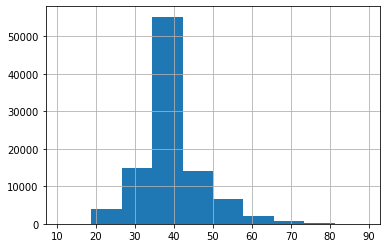

In [25]:
# Check the distribution of the Borrowers age

df['Borrower_Age'].hist()

In [26]:
# The age group over 60 and below 25 might be bias therefore drop those age groups

df = df[((df['Borrower_Age'] < 60)  | 
         (df['Borrower_Age'] > 25)) & 
        
        (df['BorrowerType'] != 'COMMERCIAL')]

df = df.reset_index(drop=True)

### 4.4.4 - 'BorrowerYearOfBirth' Columns

In [27]:
# Change the values in the 'BorrowerCreditQuality' column

replace_CreditQuality = {'No Data'     :'NO DATA' ,
                         'Prime'       :'PRIME'   ,
                         'Near Prime'  :'PRIME'   ,
                         'Vida 1'      :'VIDA'    ,
                         'Vida 2'      :'VIDA'    ,
                         'Vida 3'      :'VIDA'    ,
                         'Vida 4'      :'VIDA'    ,
                         'Vida 5'      :'VIDA'    ,
                         'Acquired'    :'ACQUIRED'
                        }

df['BorrowerCreditQuality'].value_counts()

No Data        48085
Prime          33565
PRIME           6579
PASS TYPE A     3795
PASS TYPE B     3380
PASS TYPE C     2529
Vida 1            57
Acquired          49
Vida 2            13
Vida 3             8
Near Prime         7
Vida 4             5
Vida 5             1
Name: BorrowerCreditQuality, dtype: int64

### 4.4.5 - 'FirstTimeBuyer' Columns

In [28]:
# No Action is needed for this column

df['FirstTimeBuyer'].value_counts()

N          48685
No Data    36816
Y          12572
Name: FirstTimeBuyer, dtype: int64

### 4.4.6 - 'ForeignNational' Columns

In [29]:
# No Action is needed for this column

df['ForeignNational'].value_counts()

No Data    79575
Y          17888
N            610
Name: ForeignNational, dtype: int64

### 4.4.7 - 'GeographicRegionList' Columns

In [30]:
# Use external file for nuts_list 

nuts_list = nuts_list[['NUTS-Code','Level']]
nuts_list = nuts_list.rename({'NUTS-Code':'GeographicRegionList'}, axis=1)

nuts_list = nuts_list.drop_duplicates()
nuts_list.head(2)

,GeographicRegionList,Level
0,NaN,1
1,BE,2


In [31]:
# Merge the nuts_list file and main data set
# Drop the null values after merging

df = df.merge(nuts_list, on=['GeographicRegionList'], how='left')
df = df[df['Level'].notnull()]

In [32]:
# Drop the 'GeographicRegionList' column - dummy variable

df = df.drop(columns=['GeographicRegionList'], axis=1)

### 4.4.8 - 'Purpose' Columns

In [33]:
# Check the 'Purpose' column

df['Purpose'].value_counts()

PURCHASE                     53871
REMORTGAGE                   30218
DEBT CONSOLIDATION            3256
REMORTGAGE EQUITY RELEASE     2015
RENOVATION                    1301
EQUITY RELEASE                1251
NO DATA                        949
RIGHT TO BUY                   942
INVESTMENT                     729
OTHER                          299
REMORTGAGE NEW TERMS            69
CONSTRUCTION                     2
Name: Purpose, dtype: int64

In [34]:
# Change the data in Purpose column

df['Purpose'] = df['Purpose'].apply(lambda x: 'NO DATA' if x == 'OTHER' else x)

### 4.4.9 - 'LoanOriginationDate' & 'DateOfLoanMaturity' Columns

In [35]:
# Create a new column 'Diff_Maturity_Origin' and take the difference between 
# 'DateOfLoanMaturity' - 'LoanOriginationDate'

# Create a new column 'Diff_Cutoff_Origin' and take the difference between 
# 'PoolCutoffDate' - 'LoanOriginationDate'

df['Diff_Maturity_Origin'] = (df['DateOfLoanMaturity'] - df['LoanOriginationDate']).dt.days
df['Diff_Cutoff_Origin']   = (df['PoolCutoffDate']     - df['LoanOriginationDate']).dt.days

In [36]:
# Drop the 'PoolCutoffDate','LoanOriginationDate','DateOfLoanMaturity'
# Dummy variables 

df = df.drop(columns=['PoolCutoffDate','LoanOriginationDate','DateOfLoanMaturity'], axis=1)

In [37]:
# Check the 'BorrowersEmploymentStatus'

df['BorrowersEmploymentStatus'].value_counts()

EMPLOYED         60450
UNEMPLOYED       21786
SELF EMPLOYED    11422
PENSIONER         1244
Name: BorrowersEmploymentStatus, dtype: int64

## 4.5 Exploratory Analysis

### 4.5.1 Exploratory Analysis and Outliers

No handles with labels found to put in legend.


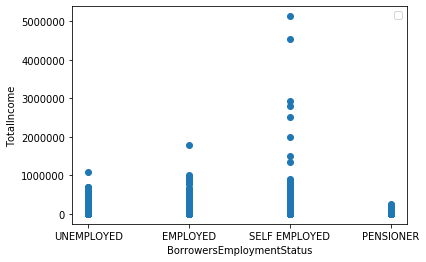

In [38]:
# Relationship between columns
plt.scatter(df['BorrowersEmploymentStatus'], df['TotalIncome'])

plt.xlabel('BorrowersEmploymentStatus')
plt.ylabel('TotalIncome')
plt.legend()


In [39]:
# Drop the outliers if the 'EmploymentStatus' ==> Self Employed and 'Total Income' is over 1 000 000
# It looks like a outliers

df = df[~((df['BorrowersEmploymentStatus'] == 'SELF EMPLOYED') &
          (df['TotalIncome'] > 1000000))]

### 4.5.2 Exploratory Analysis

No handles with labels found to put in legend.


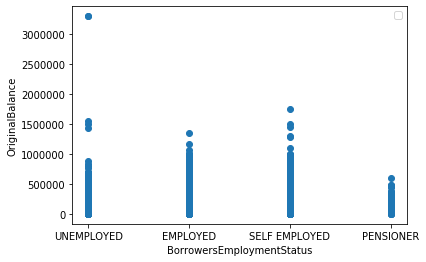

In [40]:
# Relationship between columns
plt.scatter(df['BorrowersEmploymentStatus'], df['OriginalBalance'])

plt.xlabel('BorrowersEmploymentStatus')
plt.ylabel('OriginalBalance')
plt.legend()

### 4.5.3 Exploratory Analysis

No handles with labels found to put in legend.


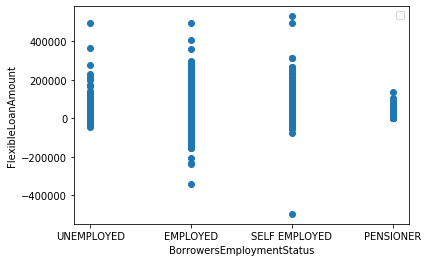

In [41]:
# Relationship between columns
plt.scatter(df['BorrowersEmploymentStatus'], df['FlexibleLoanAmount'])

plt.xlabel('BorrowersEmploymentStatus')
plt.ylabel('FlexibleLoanAmount')
plt.legend()

In [ ]:
# Relationship between columns
 
color                     = ['Red','Blue','Green','Yellow']    
BorrowersEmploymentStatus = ['EMPLOYED','UNEMPLOYED','SELF EMPLOYED','PENSIONER']
    
for i in range(len(BorrowersEmploymentStatus)):
    
    df_1 = df[df['BorrowersEmploymentStatus'] == BorrowersEmploymentStatus[i]] 
    plt.scatter(df_1['Borrower_Age'], df_1['TotalIncome'], c=color[i], label=BorrowersEmploymentStatus[i])

plt.xlabel('Borrower_Age')
plt.ylabel('TotalIncome')
plt.legend()

## 4.6 Correlation Matrix

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,15))

corr_select = sns.heatmap(corr, annot=True, cmap='coolwarm')
bottom, top = corr_select.get_ylim()

corr_select.set_ylim(bottom + 0.5, top - 0.5)


In [ ]:
# Drop highly correlated columns 

def correlated_columns(df, threshold):
    
    col_corr    = set()
    corr_matrix = df.corr()
    
    for i in range(len(corr_matrix.columns)):
    
        for j in range(i):
                   
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                   
    return col_corr

In [ ]:
# If the correlation between columns are higher than 80% then drop these columns

corr_features = correlated_columns(df, 0.8)
len(set(corr_features))

In [ ]:
# Names of the dropping columns

corr_features

In [ ]:
# Drop the highly correlated columns

df = df.drop(corr_features, axis=1)

## 4.7 Label Encoding

In [ ]:
# Change the integer columns to numberic columns applied label encoding

from sklearn.preprocessing import LabelEncoder

cols = ['BorrowersEmploymentStatus','BorrowerType','BorrowerCreditQuality','FirstTimeBuyer','ForeignNational','Purpose']
le   = LabelEncoder()

for i in cols:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

## 4.8 Feature Selection - Back and Forward Method was applied 

In [ ]:
# After many iteration, those columns are chosen for trainin model

df = df[['BorrowersEmploymentStatus',
         'BorrowerType',
         'BorrowerCreditQuality',
         'FirstTimeBuyer',
         'Purpose', 
         'TotalIncome',
         'Level',
         'CurrentBalance', 
         'FirstTimeBuyer',
         'Borrower_Age',
         'Diff_Maturity_Origin',
         'target']]

In [ ]:
# 0.703325%
'''
df = df[['BorrowersEmploymentStatus',
         'BorrowerCreditQuality',
         'FirstTimeBuyer',
         'Purpose', 
         'TotalIncome',
         'Level',
         'CurrentBalance', 
         'FirstTimeBuyer',
         'Borrower_Age',
         'Diff_Maturity_Origin',
         'target']]
    
'''
print('')

In [ ]:
'''

df = df[['BorrowersEmploymentStatus',

         'BorrowerCreditQuality',


         'FirstTimeBuyer',
         'LoanAge', 

         'TotalIncome',
         'Diff_Maturity_Origin',
         'Borrower_Age',


         'target']]
         
'''
print('')

## 4.9 Clean Outliers

In [ ]:
# Apply Quantile method for cleaning outliers from the data set 
# Max thresold is .95

max_thresold = df['TotalIncome'].quantile(0.95)
max_thresold

In [ ]:
# Apply Quantile method for cleaning outliers from the data set 
# Min thresold is .05

min_thresold = df['TotalIncome'].quantile(0.05)
min_thresold

In [ ]:
df.shape

In [ ]:
# Remove Outliers

df = df[(df['TotalIncome']<max_thresold) & (df['TotalIncome']>min_thresold)]

In [ ]:
df.shape

## 5- Model Building

### 5.1 - Data Set Balance

In [ ]:
# Check the dataset balanced or not balanced

sns.countplot(df['target'])

In [ ]:
def check_dataset_balance(df):

    df_0 = df[df['target'] == 0]
    df_1 = df[df['target'] == 1]

    print('target_0 rows, columns:', df_0.shape, 'and target_1 rows, columns:', df_1.shape)

    print()
    if df_0.shape[0]/df_1.shape[0] > 2 or df_0.shape[0]/df_1.shape[0] < 0.5:
        print('imbalance data set')
    else:
        print('balanced  data set')

In [ ]:
check_dataset_balance(df)

The dataset is unbalanced but make it balanced is causing the dropping accuracy for the model,
Therefore oversampling is not applied, 
The dataset is small therefore under sampling was not used.

### 5.2 - Split Dataset - Dependent and Independent Features

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split dataset dependent and independent features
# Convert array

X = df.drop(['target'], axis=1)
X = np.array(X)

y = df[['target']].to_numpy()

### 5.3 Over Sampler Libraries

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

### 5.4 Over Sampler Version 1

The dataset is unbalanced but make it balanced is causing the dropping accuracy for the model,
Therefore oversampling is not applied, 
The dataset is small therefore under sampling was not used.

In [ ]:
#smk      = SMOTETomek(random_state=12)
#X_b, y_b = smk.fit_resample(X, y)

In [ ]:
#X_b.shape

In [ ]:
#y_b.shape 

### 5.5 Over Sampler Version 2

The dataset is unbalanced but make it balanced is causing the dropping accuracy for the model,
Therefore oversampling is not applied, 
The dataset is small therefore under sampling was not used.

In [ ]:
#Over_Sampler = RandomOverSampler(random_state=42) 
#X_c, y_c     = Over_Sampler.fit_resample(X,y)

In [ ]:
#X_c.shape

In [ ]:
#y_c.shape

### 5.6 Over Sampler Version 3

The dataset is unbalanced but make it balanced is causing the dropping accuracy for the model,
Therefore oversampling is not applied, 
The dataset is small therefore under sampling was not used.

In [ ]:
#Over_Sampler_2 = SMOTE(random_state=12) 
#X_d, y_d      = Over_Sampler_2.fit_resample(X,y)

In [ ]:
#X_d.shape

In [ ]:
#y_d.shape

## 6- Building Model

### 6.1 - Scaling dataset

The dataset is not scaled, cause it cause drop the model accuracy

In [ ]:
# Scaling dataset

from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

#X   = scaling.fit_transform(X)
#X_b = scaling.fit_transform(X_b)
#X_c = scaling.fit_transform(X_c)
#X_d = scaling.fit_transform(X_d)

In [ ]:
# Upload the model libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold

In [ ]:
# Impoting classification models

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# to perform K-fold cross validation
from sklearn import model_selection

In [ ]:
# Gaussian Naive Bayes classifier
gnb_classifier = GaussianNB()

In [ ]:
# Logistic Regression classifier
lr_classifier = LogisticRegression(penalty = 'l2', random_state = 0)

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

In [ ]:
# eXtreme Gradient Boosting Classifier (XGBClassifier)
xgb_classifier = XGBClassifier()

In [ ]:
# models list to automate the training and testing 
models = []

In [ ]:
# append classifiers to the list
models.append(('GBN',gnb_classifier))
models.append(('LR',lr_classifier))
models.append(('DT',dt_classifier))
models.append(('XGB',xgb_classifier))
models.append(('RF',rf_classifier))

In [ ]:
# list of the models that using for training the model
models

In [ ]:
# evaluate each model in turn
results = []
names = []

# comparing models based on the accuracy

scoring = 'accuracy'

for name, model in models:
    
    # k-fold crossvalidation
    
    kfold = model_selection.KFold(n_splits=20)
    
    #applying the crossvalidation
    
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    
    #adding results to the list
    
    results.append(cv_results)
    
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Based on the models,
# Logistic Regression has the best performance

### 6.2 - Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty'  : ['l2']                                        ,
               'C'        : np.power(10.0, np.arange(-10, 10))
              }]

lr_classifier = LogisticRegression(penalty = 'l2', random_state = 0)
grid = GridSearchCV(lr_classifier, param_grid = param_grid, cv = 20, verbose = True)


grid_result = grid.fit(X,y)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)